# 02. Neural Network Classification with Pytorch

## 1. Criar dados para classificação e deixa-los prontos

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

#m fazer 1000 exemplos
n_samples = 1000

#criar círculos
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 Examples of X: \n {X[:5]}")
print(f"First 5 Examples of y: \n {y[:5]}")

First 5 Examples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 Examples of y: 
 [1 1 1 1 0]


In [ ]:
#criando DataFrame
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


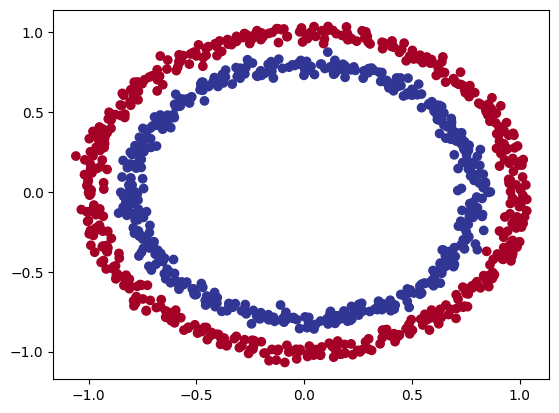

In [ ]:
#Visualizar com gráficos
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

### Checando input e output shapes

In [ ]:
X_sample = X[10]
y_sample = y[10]

print(f"Valores para um exemplo de X: {X_sample} e o mesmo para y: {y_sample}")
print(f"shapes para um exemplo de X: {X_sample}.shape e o mesmo par y: {y_sample.shape}")

Valores para um exemplo de X: [-0.64249042 -0.54409929] e o mesmo para y: 1
shapes para um exemplo de X: [-0.64249042 -0.54409929].shape e o mesmo par y: ()


###Transformar dados em tensores e criar treino e teste

In [ ]:
import torch
torch.__version__

'2.1.0+cu121'

In [ ]:
#transformando os dados em tensores
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
torch.manual_seed(42)

In [ ]:
#dividino em teste e treino
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2, #20%será teste
                                                   random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
n_samples

1000

### 2. Vamos construir um modelo

1. setup do device para usar gpu
2. Comnstruir o modelo (subclasse nn.Module)
3. Definir função de loss e opttimizer
4. Criar loop de treino e teste

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Agora que ja arrumamos o device vamos criar um modelo que:

1. Subclass nn.Module
2. Criar 2 nn.Linear() layers que serão capazes de lidar com os dados
3. Definir o forward()
4. Instanciar o modelo e mandar pro CUDA

In [ ]:
#1. construir um modelo que subclasse nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    #2. criar 2  nn.Linear layers capazes de lidar com os dados
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  #3. definir a função de forward
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) #x -> layer_1 ->layer 2 -> output

#4. Instanciar o modelo
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cuda'

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
#Vamos replicar o modelo acima usando nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
#Fazer predições
with torch.inference_mode():

  untrained_preds = model_0(X_test.to(device))
print(f"Tamanho das predições: {len(untrained_preds)}, Shape: {untrained_preds.shape} ")
print(f"Tamanho dos dados de teste: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Tamanho das predições: 200, Shape: torch.Size([200, 1]) 
Tamanho dos dados de teste: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2. 1 setar função de loss e optimizer

qual loss e qual otimizador usar

para essa regressão talvez eu queira MAE ou MSELoss

Para classificação talvez você queira binary cross entropy ou categorical cross entropy


* Para a loss vamos usar torch.nn.BcewithLOgitLOss

In [ ]:
#setar função de loss
loss_fn = nn.BCEWithLogitsLoss()  #função sigmoid built in
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
#calculando acurácia
def acuraccy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


## 3. Treinar modelo

  Para treinar nosso modelo precisaremos criar um loop de treino
1. Forward pass
2. calcular a loss
3. otimizador zero grad
4. loss backward
5. otimizador step


In [ ]:
#Ver os primeiros 5 outputs do forward pass dos dados de teste
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [ ]:
#usar a função de ativação sigmoid nos nossos logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [ ]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [ ]:
#achar as máscaras preditas
y_preds = torch.round(y_pred_probs)

#in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#checar por igualdade
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#se livrar da dimensão extra
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

### 3.2 Loop de treino e teste

In [ ]:
!nvidia-smi

Tue Mar 12 12:21:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0              32W /  70W |    151MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#setar número de épocas
epochs = 400

#mandar data pro cuda
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#construnindo loop
for epoch in range(epochs):
  #treinamento
  model_0.train()

  #1. forward pass
  y_logits = model_0(X_train).squeeze(1)
  y_pred = torch.round(torch.sigmoid(y_logits))  #mudar logits -> pred probs -> pred labels

  #2. calcular  loss e acurácia
  loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss espera logits brutos como input
                 y_train,
                 )
  acc = acuraccy_fn(y_true=y_train,
                    y_pred=y_pred)
  #3.Optimizer zerograd
  optimizer.zero_grad()

  #4.Optimizer step para descida do gradiente
  optimizer.step()

  ###testando
  model_0.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Clcular loss /acurácia do teste
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = acuraccy_fn(y_true=y_test,
                           y_pred=test_pred)

    #printar o que está acontecendo
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69462, Test acc: 57.50%
Epoch: 10 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69462, Test acc: 57.50%
Epoch: 20 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69462, Test acc: 57.50%
Epoch: 30 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69462, Test acc: 57.50%
Epoch: 40 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69462, Test acc: 57.50%
Epoch: 50 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69462, Test acc: 57.50%
Epoch: 60 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69462, Test acc: 57.50%
Epoch: 70 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69462, Test acc: 57.50%
Epoch: 80 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69462, Test acc: 57.50%
Epoch: 90 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69462, Test acc: 57.50%
Epoch: 100 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69462, Test acc: 57.50%
Epoch: 110 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69462, Test acc: 57.50%
Epoch: 120 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69462, T

##4. Fazer predições e avaliar o modelo

Pelas métricas o modelo não parece estar aprendendo
Então vamos visualizar e depois investigar
Vamos importar um módulo

In [ ]:
import requests
from pathlib import Path

#Download funções que ajudam do Pytorch repo(caso não estejam baixadas)
if Path("helper_functions.py").is_file():
  print("helper existe, skippar download")
else:
  print("Download helper_functions")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions


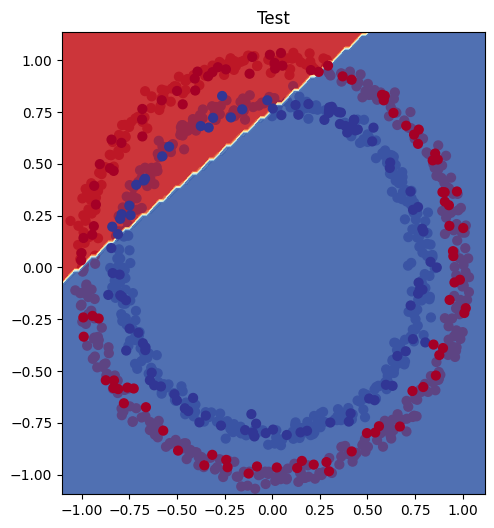

In [ ]:
#Plotar decision boundary do modelo
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 1)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

##5. Melhorando um modelo

* Adicionar layers
* Adicionar hidden units
* fitar por mais tempo
* Mudar funções de ativação
* Mudar função de loss
* Ajustar Learning Rate


Vamos tentar melhorar inserindo mais hidden units 5 -> 10 e numero de layers 2 -> 3. Aumentar o número de épocas


In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:

# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [ ]:
#criar um loop de treino e avaliaçao
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  #0. treinar
  model_1.train()

  #1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))  # logits - pred probs -> predictions

  #2 calcular a loss
  loss = loss_fn(y_logits,
                 y_train)
  acc = acuraccy_fn(y_true=y_train,
                    y_pred=y_pred)
  #3. Optimizer zero grad
  optimizer.zero_grad()

  #$ Loss backward (backpropagation)
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  #testando
  model_1.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calcular a loss | acurácia
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = acuraccy_fn(y_true=y_test,
                           y_pred=test_pred)

    #printar
  if epoch % 10 == 0:
      print(f"Epoch: {epoch} |Train: | Loss: {loss:.5f} | acc: {acc:.2f}%| Test: | test loss:{test_loss:.5f} | test acc: {test_acc:.2f} ")



Epoch: 0 |Train: | Loss: 0.69396 | acc: 50.88%| Test: | test loss:0.69261 | test acc: 51.00 
Epoch: 10 |Train: | Loss: 0.69369 | acc: 50.25%| Test: | test loss:0.69270 | test acc: 50.00 
Epoch: 20 |Train: | Loss: 0.69351 | acc: 50.12%| Test: | test loss:0.69283 | test acc: 49.50 
Epoch: 30 |Train: | Loss: 0.69339 | acc: 50.50%| Test: | test loss:0.69297 | test acc: 48.00 
Epoch: 40 |Train: | Loss: 0.69329 | acc: 50.38%| Test: | test loss:0.69310 | test acc: 49.00 
Epoch: 50 |Train: | Loss: 0.69322 | acc: 49.88%| Test: | test loss:0.69324 | test acc: 50.00 
Epoch: 60 |Train: | Loss: 0.69317 | acc: 49.38%| Test: | test loss:0.69336 | test acc: 51.50 
Epoch: 70 |Train: | Loss: 0.69312 | acc: 49.38%| Test: | test loss:0.69348 | test acc: 50.50 
Epoch: 80 |Train: | Loss: 0.69309 | acc: 50.12%| Test: | test loss:0.69359 | test acc: 50.00 
Epoch: 90 |Train: | Loss: 0.69307 | acc: 50.50%| Test: | test loss:0.69370 | test acc: 48.50 
Epoch: 100 |Train: | Loss: 0.69305 | acc: 50.38%| Test: | tes

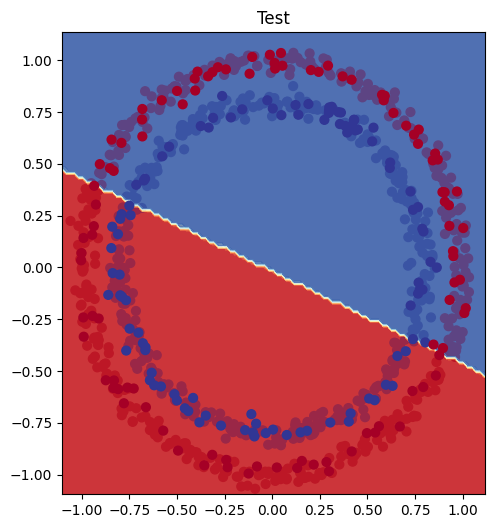

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 1)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

###Preparando dados para saber se nosso modelo consegue fitar uma linha reta

Um jeito de ver problemas é testar em coisas mais simples

In [ ]:
#Criar dados (mesmo que notebook 1)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#criar data
X_regression = torch.arange(start,end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

#checar dados
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
#criar treino e teste
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

#checar tamanho de cada
len(X_train_regression), len(y_train_regression), len(X_test_regression),  len(y_test_regression)

(80, 80, 20, 20)

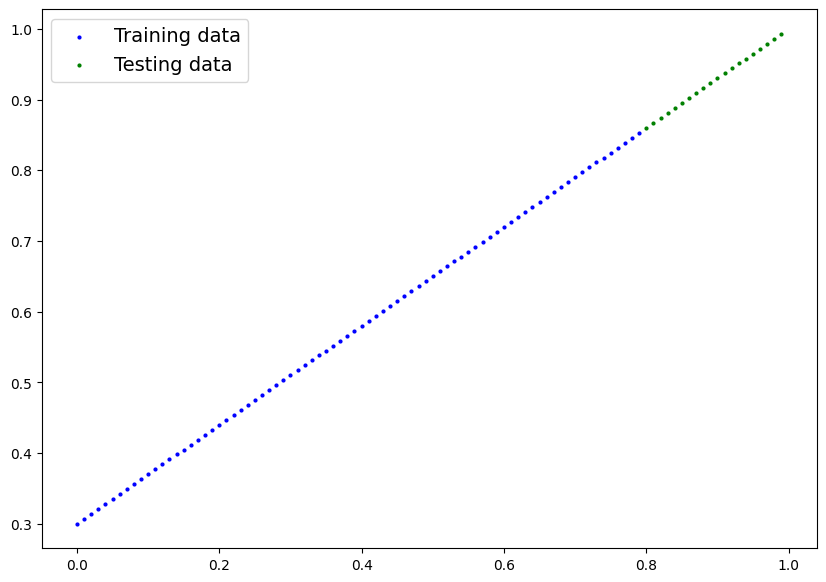

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression
                 );

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#LOSS AND OPTIMIZER
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)


In [ ]:
#treinar o modelo
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

#colocar os dados no cuda
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression =  X_test_regression.to(device), y_test_regression.to(device)

#treinando
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  #pritnando as coisas
  if epoch % 10 == 0:
    print(f"Treino | loss: {loss:.5f} | LOSS DE TESTE: {test_loss:.5f}")

Treino | loss: 0.75986 | LOSS DE TESTE: 0.54143
Treino | loss: 0.14550 | LOSS DE TESTE: 0.02363
Treino | loss: 0.14420 | LOSS DE TESTE: 0.05597
Treino | loss: 0.10136 | LOSS DE TESTE: 0.03785
Treino | loss: 0.07525 | LOSS DE TESTE: 0.00984
Treino | loss: 0.07625 | LOSS DE TESTE: 0.02102
Treino | loss: 0.10320 | LOSS DE TESTE: 0.02754
Treino | loss: 0.08643 | LOSS DE TESTE: 0.01007
Treino | loss: 0.06937 | LOSS DE TESTE: 0.01326
Treino | loss: 0.08678 | LOSS DE TESTE: 0.03027
Treino | loss: 0.09309 | LOSS DE TESTE: 0.02901
Treino | loss: 0.06735 | LOSS DE TESTE: 0.00973
Treino | loss: 0.08538 | LOSS DE TESTE: 0.03464
Treino | loss: 0.07850 | LOSS DE TESTE: 0.02388
Treino | loss: 0.09153 | LOSS DE TESTE: 0.02218
Treino | loss: 0.07135 | LOSS DE TESTE: 0.02059
Treino | loss: 0.06966 | LOSS DE TESTE: 0.01357
Treino | loss: 0.07144 | LOSS DE TESTE: 0.01682
Treino | loss: 0.06925 | LOSS DE TESTE: 0.01691
Treino | loss: 0.07345 | LOSS DE TESTE: 0.02627
Treino | loss: 0.07376 | LOSS DE TESTE: 

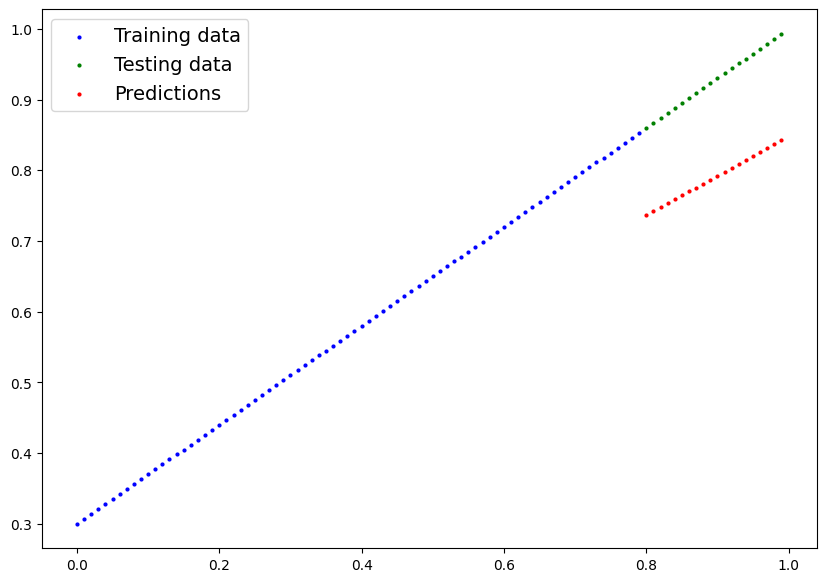

In [ ]:
#modo avaliaçãop
model_2.eval()

#fazer predições
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

#plotar data e predições
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

## 6. Não linearidade

### 6.1 Recriando dados não lineares

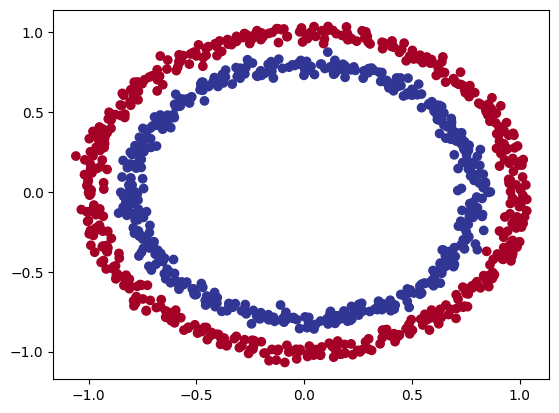

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))



```
# Isto está formatado como código
```

### 6.2 Construindo modelo nãolinear

In [ ]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
#setup da loss e do optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

###6.3 Treinando o modelo sem linearidade

In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = acuraccy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = acuraccy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, | test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, | test acc: 50.00
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, | test acc: 52.50
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, | test acc: 55.00
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, | test acc: 56.00
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, | test acc: 56.50
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, | test acc: 56.50
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, | test acc: 56.00
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, | test acc: 59.00
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, | test acc: 67.50
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, | test acc: 79.00


### 6.4 AValainado o modelo treinado sem linearidade

In [ ]:
#fazendo predfições
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

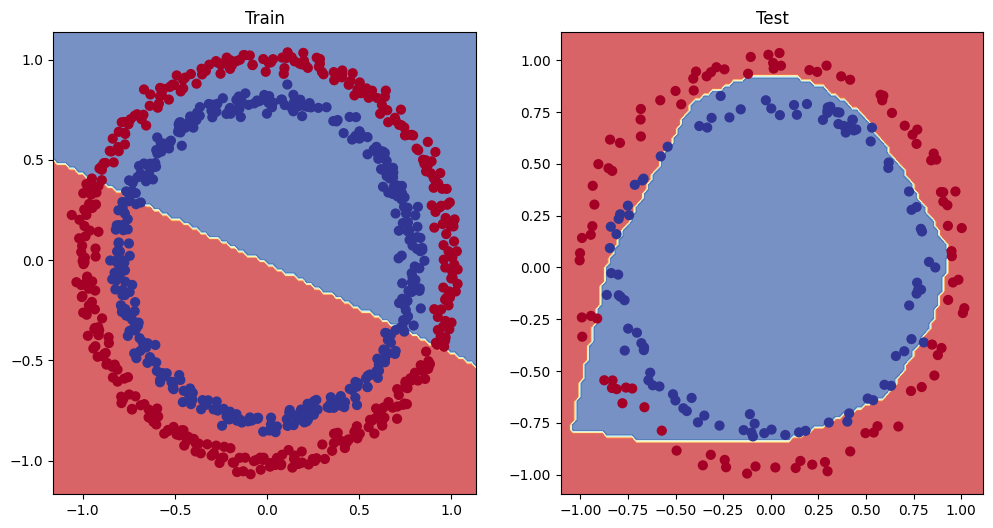

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicando funções de ativação não lineares


In [ ]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

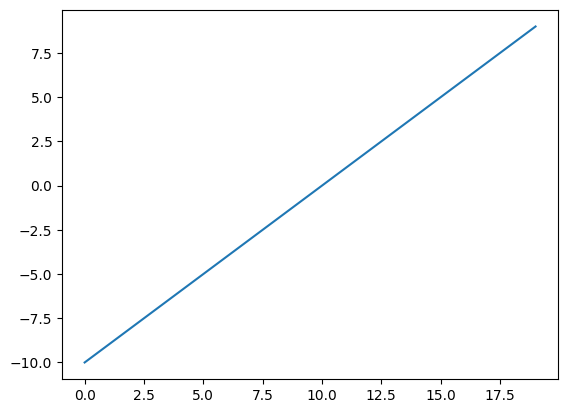

In [ ]:
#visualizar dados
plt.plot(A)

In [ ]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) #input tem que ser tensor

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

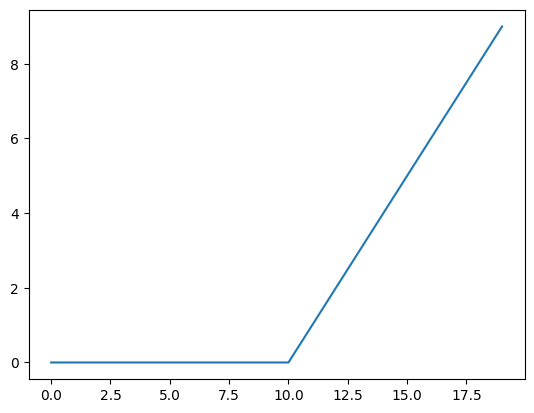

In [ ]:
#PLOT rELU ACTIVAtion function
plt.plot(relu(A));

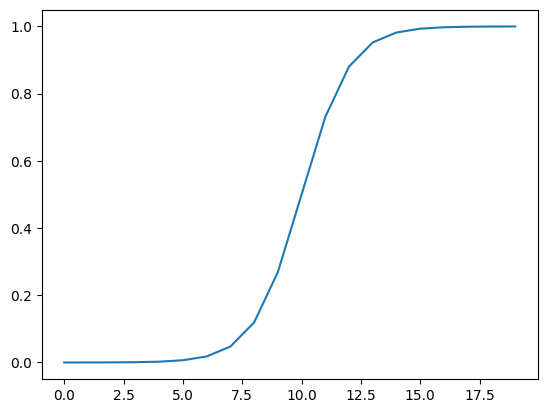

In [ ]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))
plt.plot(sigmoid(A))

## 8. Colocando tudo junto com multi-class classification

### 8.1 criando um dataset multi-class

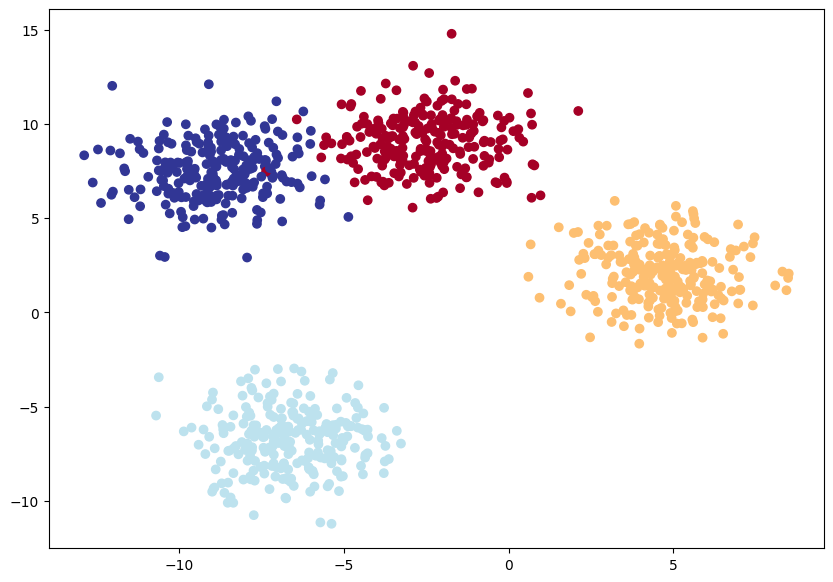

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import  train_test_split

#setar hyperparameters

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. criar dados multiclasse
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. Transformar dados em tensores
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. SPlit entre treino e test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plotar dados
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);


### 8.2 Criando um modelo de classificação multi classe

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
#construindo o modelp
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

#criar uma instancia de blobmodel e mandar pro cuda
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Criar função de loss e optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)


### 8.4 extraindo predições

In [ ]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [ ]:
#converter as predições do nosso modelo em predictions labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Criar loop de treino e teste

In [ ]:
#fitar o modelo aos dados
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setar numero de epcas
epochs = 100

#mandar data pro cuda
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

#loop pelos dados
for epoch in range(epochs):
  #treinamento
  model_4.train()

  y_logits = model_4(X_blob_train)

  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = acuraccy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testando

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = acuraccy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

    ##printar
    if epoch % 10 == 0:
      print(f"Epoch: {epoch}, Loss: {loss:.4f} | Test Loss:{test_loss:.2f}, Test acc:{test_acc:.2f}")

Epoch: 0, Loss: 1.1588 | Test Loss:1.08, Test acc:48.00
Epoch: 10, Loss: 0.6448 | Test Loss:0.66, Test acc:97.50
Epoch: 20, Loss: 0.4254 | Test Loss:0.43, Test acc:100.00
Epoch: 30, Loss: 0.2529 | Test Loss:0.25, Test acc:99.50
Epoch: 40, Loss: 0.1123 | Test Loss:0.10, Test acc:99.50
Epoch: 50, Loss: 0.0663 | Test Loss:0.06, Test acc:99.50
Epoch: 60, Loss: 0.0507 | Test Loss:0.04, Test acc:99.50
Epoch: 70, Loss: 0.0430 | Test Loss:0.03, Test acc:99.50
Epoch: 80, Loss: 0.0384 | Test Loss:0.03, Test acc:99.50
Epoch: 90, Loss: 0.0352 | Test Loss:0.03, Test acc:99.50


### 8.6 Fazendo predições e avaliando

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

#ver as primeiras 10 predições
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [ ]:
#ir dos logits para as predições
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5998e-05, 2.7210e-04]], device='cuda:0')

In [ ]:
#vamos de probabilidades de prob para pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

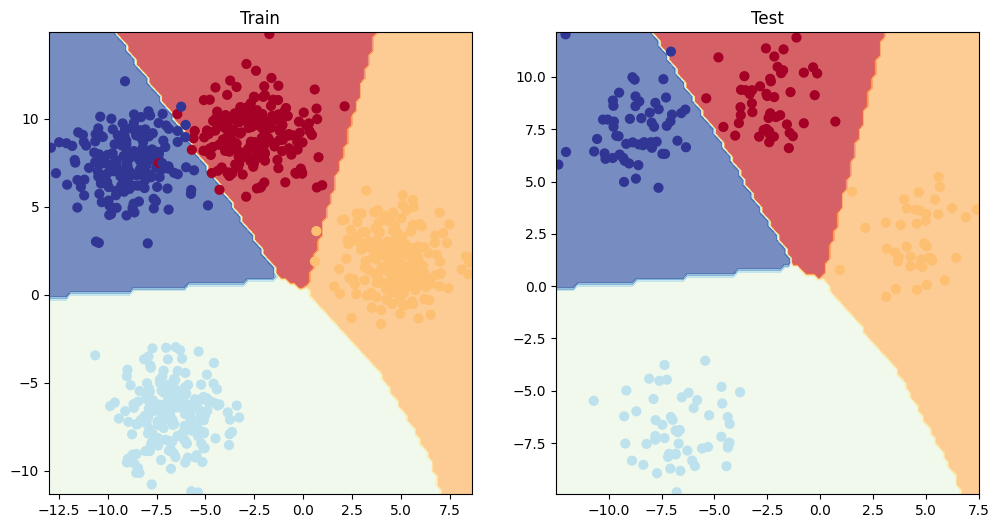

In [ ]:
#plotar
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. Métricas

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 19.7 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy().to(device)

torchmetric_accuracy(y_preds, y_blob_test)